In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [3]:
class result_class:
    alpha = 0
    stochastic_matrix = []
    probability_vector = []
    time = 0
    
    def __init__(self, alpha):
        self.alpha = alpha
    
    def set_alpha(self, alpha):
        self.alpha = alpha
    
    def set_stochastic_matrix(self, stochastic_matrix):
        self.stochastic_matrix = stochastic_matrix
    
    def set_probability_vector(self, probability_vector):
        self.probability_vector = probability_vector
        
    def set_time(self, time):
        self.time = time
    
    def get_alpha(self):
        return self.alpha
    
    def get_stochastic_matrix(self):
        return self.stochastic_matrix
    
    def get_probability_vector(self):
        return self.probability_vector
    
    def get_time(self):
        return self.time
    
    def print_result(self):
        print("alpha is %f" % self.alpha)
        print("stochastic matrix is %s" % self.stochastic_matrix)
        print("probability vector is %s" % self.probability_vector)        
        print("time used is %f" % self.time)

In [4]:
N = []
for i in range(7):
    N.append([0]*7)

N = pd.DataFrame(N)

N.iloc[0, 1] = N.iloc[1, 0] = 0.58
N.iloc[0, 4] = N.iloc[4, 0] = 0.14
N.iloc[0, 6] = N.iloc[6, 0] = 0.94
N.iloc[3, 6] = N.iloc[6, 3] = 0.14
N.iloc[2, 1] = N.iloc[1, 2] = 0.14
N.iloc[5, 1] = N.iloc[1, 5] = 0.14
N.iloc[5, 2] = N.iloc[2, 5] = 0.14 

P = N
for i in range(np.shape(N)[0]):
    sum_row = 0.0
    for j in range(np.shape(N)[1]):
        sum_row += N.iloc[i, j]
    for j in range(np.shape(N)[1]):
        P.iloc[i, j] = round(N.iloc[i, j]*100/sum_row)/100
Pt = (P.T).values
E = np.identity(np.shape(Pt)[0])

matrix_r = []
matrix_r.append([1, 0, 0, 0, 0, 0, 0])
matrix_r.append([0, 1, 0, 0, 0, 0, 0])
matrix_r.append([0, 0, 1, 0, 0, 0, 0])
matrix_r.append([0, 0, 0, 1, 0, 0, 0])
matrix_r.append([0, 0, 0, 0, 1, 0, 0])
matrix_r.append([0, 0, 0, 0, 0, 1, 0])
matrix_r.append([0, 0, 0, 0, 0, 0, 1])

In [5]:
result_list = []
for step_alpha in np.arange(0, 1.01, 0.01):
    a = round(step_alpha*100)/100
    
    v_final = []
    start = time.perf_counter()
    for j in range(7):
        r0 = np.array(matrix_r[j])
        v = r0
        r0 = np.dot(np.linalg.inv(E-(1-a)*Pt), a*r0)
        for i in range(np.size(r0)):
            r0[i] = round(r0[i]*100)/100
        v_final.append(r0)
    elapsed = (time.perf_counter() - start)
    v_final = pd.DataFrame(v_final)
    v_final = v_final.T
    current_object = result_class(a)
    current_object.set_stochastic_matrix(v_final)
    current_object.set_probability_vector(np.dot([0, 1, 0, 0, 1, 0, 0],v_final.values))
    result_list.append(current_object)

### 研究alpha的取值与0点变坏的概率变化曲线

index 0 biggest probability is 0.210000, current alpha is 0.090000
index 2 biggest probability is 0.250000, current alpha is 0.170000
index 3 biggest probability is 0.200000, current alpha is 0.040000
index 5 biggest probability is 0.250000, current alpha is 0.170000
index 6 biggest probability is 0.200000, current alpha is 0.060000


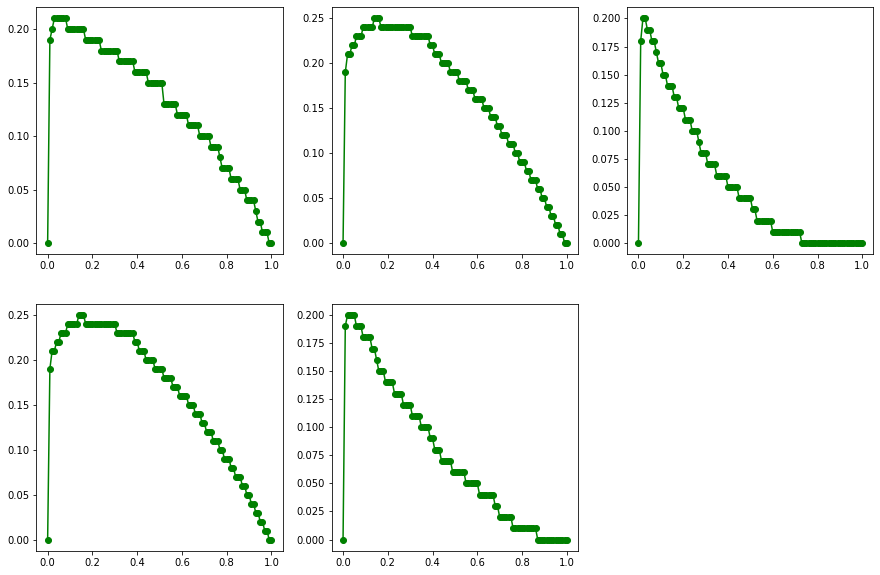

In [19]:
plt.figure(figsize=(15,10))
list_index = [0, 2, 3, 5, 6]
i = 1
for current_nidex in list_index:
    list_alpha = []
    list_probability_0 = []
    for result in result_list:
        list_alpha.append(result.get_alpha())
        vector_probalibity = result.get_probability_vector()[current_nidex]

        list_probability_0.append(vector_probalibity)
    result = 0
    index_order = 0
    for current_probability in list_probability_0:
        if current_probability > result:
            result = current_probability
            index_order += 1

        elif current_probability == result:
            index_order += 1
            continue
        else:
            break
    print("index %d biggest probability is %f, current alpha is %f" % (current_nidex, result, list_alpha[index_order]))
    plt.subplot(2, 3, i)
    i += 1
    plt.plot(list_alpha,list_probability_0,'o-',color = 'g',label="ATT-RLSTM")#s-:方形
plt.show()

### alpha的取值与0点保留在原地的概率

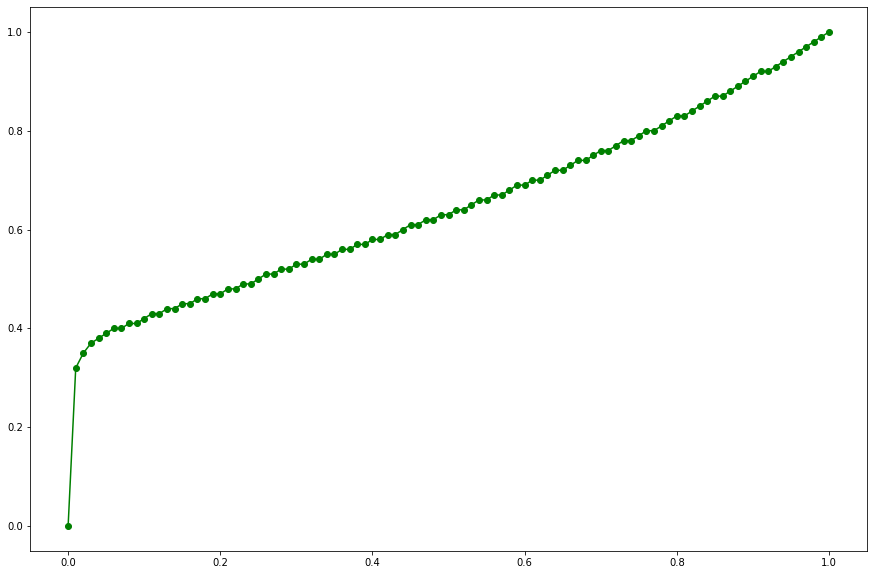

In [60]:
list_alpha = []
list_probability_0 = []
for result in result_list:
    list_alpha.append(result.get_alpha())
    list_probability_0.append(result.get_stochastic_matrix()[0][0])

plt.figure(figsize=(15,10))
plt.plot(list_alpha,list_probability_0,'o-',color = 'g',label="ATT-RLSTM")#s-:方形
plt.show()